# <p style="color:red"><i><b>IN DEVELOPMENT</b></i></p>

# Part 2: Training an RBM *with* a phase

## Getting Started

The following imports are needed to run this tutorial.

In [9]:
from rbm_tutorial import RBM_Module, ComplexRBM
import torch
import cplx
import unitary_library
import numpy as np
import csv

*rbm_tutorial.py* contains the child class **ComplexRBM** that inherits properties and functions from the parent class **RBM_Module**. 
 
Pytorch (torch) is used as a replacement for doing some algebra that would normally be done with numpy. Pytorch also allows one to take advantage of GPU acceleration among many other things. Don't worry if you don't have a GPU on your machine; the tutorial will run in no time on a CPU.

One downfall of pytorch is that it currently does not have complex number support, so we have written our own complex algebra library (cplx.py). For more information on this library's contents, please refer to: **LINK TO CPLX.PY DOCUMENTAION**. We hope that pytorch will implement complex numbers soon!

*unitary_library* is a package that will create a dictionary of the unitaries needed in order to train a ComplexRBM object (more later).

## Training

Let's go through training a complex wavefunction. To evaluate how the RBM is training, we will compute the fidelity between the true wavefunction of the system and the wavefunction the RBM reconstructs. We first need to load our training data and the true wavefunction of this system. However, we also need the corresponding file that contains all of the measurements that each site is in. The dummy dataset we will train our RBM on is a two qubit system who's wavefunction is $\psi =\left.\frac{1}{2}\right\vert+,+\rangle - \left.\frac{1}{2}\right\vert+,-\rangle + \left.\frac{i}{2}\right\vert-,+\rangle - \left.\frac{i}{2}\right\vert-,-\rangle$, where $+$ and $-$ represent spin-up and spin-down, respectively.

In [10]:
train_set2 = np.loadtxt('2qubits_train_samples.txt', dtype= 'float32')
psi_file   = np.loadtxt('2qubits_psi.txt')
true_psi2  = torch.tensor([psi_file[:,0], psi_file[:,1]], dtype = torch.double)
bases      = np.loadtxt('2qubits_train_bases.txt', dtype = str)

The following arguments are required to construct a **ComplexRBM** object.

1. **A dictionary containing 2x2 unitaries, *unitaries***. We will create this dictionary in the next block with the hand of the module we imported called *unitary_library*.
2. **The number of visible units, *num_visible***. This is 2 for the case of our dataset.
3. **The number of hidden units in the amplitude hidden layer of the RBM, *num_hidden_amp***. It's recommended that the number of hidden units stay equal to the number of visible units (2 in the case of our dummy dataset).
4. **The number of hidden units in the phase hidden layer of the RBM, *num_hidden_amp***. It's recommended that the number of hidden units stay equal to the number of visible units (2 in the case of our dummy dataset).

In [11]:
unitaries = unitary_library.create_dict()
'''If you would like to add your own quantum gates from your experiment to "unitaries", do:
unitaries = unitary_library.create_dict(name='your_name', 
                                        unitary=torch.tensor([[real part], [imaginary part]], dtype=torch.double)
For example: 
unitaries = unitary_library.create_dict(name='qucumber', unitary=torch.tensor([ [[1.,0.],[0.,1.]] 
                                                                                [[0.,0.],[0.,0.]] ], dtype=torch.double))
                                                                                             
By default, unitary_library.create_dict() contains the hadamard and K gates with keys X and Y, respectively.'''

num_visible      = train_set2.shape[-1] # 2
num_hidden_amp   = train_set2.shape[-1] # 2
num_hidden_phase = train_set2.shape[-1] # 2

A **ComplexRBM** object has a function called *fit* that performs the training. *fit* takes the following arguments.

1. ***train_set***. Needed for selecting mini batches of the data.
2. ***bases***. Needed for calculating gradients (performing the correct rotations).
2. ***true_psi***. Only needed here to compute the fidelity.
3. **The number of epochs, *epochs***. The number of training cycles that will be performed. 15 should be fine.
4. **The mini batch size, *batch_size***. The number of data points that each mini batch will contain. We'll go with 10.
5. **The number of contrastive divergence steps, *k***. One contrastive divergence step seems to be good enough in most cases.
6. **The learning rate, *lr***. We will use a learning rate of 0.01 here.
7. **How often you would like the program to update you during training, *log_every***. Every 10 epochs the program will print out the fidelity.

In [4]:
epochs     = 15
batch_size = 10
k          = 1
lr         = 0.01
log_every  = 5

Epoch =  0 
Fidelity =  tensor(1.00000e-03 *
       1.5303, dtype=torch.float64)
Epoch =  5 
Fidelity =  tensor(0.3501, dtype=torch.float64)
Epoch =  10 
Fidelity =  tensor(0.9747, dtype=torch.float64)
Epoch =  15 
Fidelity =  tensor(0.9989, dtype=torch.float64)
Finished training. Saving results...
Done.


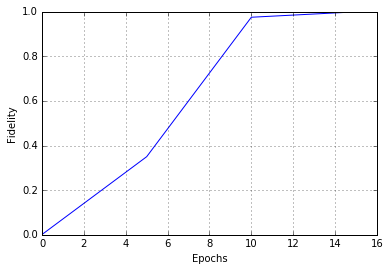

In [5]:
rbm_complex = ComplexRBM(num_visible, num_hidden_amp, num_hidden_phase)
rbm_complex.fit(train_set2, bases, true_psi2, unitaries, epochs, batch_size, k, lr, log_every)

### After Training 

After training your RBM, the *fit* function will have saved your trained weights and biases for the amplitude and the phase. Now, you have the option to generate new data from the trained RBM. The *rbm_real* object has a *sample* function that takes the following arguments.

1. The number of samples you wish to generate, *num_samples*.
2. The number of contrastive divergence steps performed to generate the samples, *k*.

In [7]:
num_samples = 100
k           = 10

samples = rbm_complex.sample(num_samples, k)

You will now find the *generated_samples_complexRBM.pkl* file in your directory that contains your new samples.